# Gathering data on journal OA status

This notebook generates and explores the landscape of `oa_status` and `default_license` for journals and self-publishing repositories using open data from:
- Polka, J. (2023). Archive of ASAPbio's list of preprint servers: policies and practices across platforms [Data set]. Zenodo. https://doi.org/10.5281/zenodo.8230987
- SpringerNature's [Hybrid journals](https://www.springernature.com/gp/open-research/about/green-or-gold-routes-to-OA/hybrid-options) site (license unknown)
- SpringerNature's [Open Access journals](https://www.springernature.com/gp/open-research/journals-books/journals) site (license unknown)

The resulting data file is stored under [oa_status.yaml](../data/oa_status.yaml)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

We define a list of open licenses:

In [2]:
open_licenses = ['CC0', 'CC BY', 'CC BY-SA', 'CC BY-NC', 'CC BY-ND', 'CC BY-NC-SA', 'CC BY-NC-ND', 'Apache-2.0', 'MIT', 'BSD-2-Clause', 'BSD-3-Clause', 'GPL-2.0', 'GPL-3.0', 'LGPL-2.1', 'LGPL-3.0', 'Mozilla Public License 2.0', 'EPL-1.0', 'ISC', 'WTFPL', 'Unlicense', 'AGPL-3.0', 'MPL-2.0', 'CDDL-1.0', 'ODC-By', 'ODC-ODbL', 'ODbL', 'PDDL', 'CC-BY 4.0']


And instantiate the links to the used data sets:

In [3]:
gold_url = "https://resource-cms.springernature.com/springer-cms/rest/v1/content/26206380/data/v7"
hybrid_url = 'https://resource-cms.springernature.com/springer-cms/rest/v1/content/26206374/data/v3'
archives_url = 'https://zenodo.org/records/8230987/files/ASAPbio%20Preprint%20Directory%202023-08-09.csv?download=1'


## SpringerNature Open Access Journals
We instantiate a data frame with the SpringerNature Open Access data:

In [4]:
gold = pd.read_excel(gold_url, skiprows=3)
gold['source'] = [gold_url for i in range(len(gold))]

In [5]:
gold.sample(3)

,Journal title,eISSN,Imprint,Default License,EUR '24,USD '24,GBP '24,Website,source
182,Clinical Cancer Bulletin,2791-3937,Springer,CC BY,1790,2190,1490,NaN,https://resource-cms.springernature.com/spring...
656,The Egyptian Journal of Internal Medicine,2090-9098,Springer,CC BY,see website,see website,see website,https://ejim.springeropen.com,https://resource-cms.springernature.com/spring...
65,Biology Direct,1745-6150,BioMed Central,CC BY + CC0,2390,2790,2090,NaN,https://resource-cms.springernature.com/spring...


Any journal with a provided APC price (`EUR '24` field, APC price in Euros) are immediately considered `gold`. If the data set provides the value `see website`, we assign an `unknown` `oa_status`, to avoid mistakenly assigning `gold` status.

In [6]:
gold['oa_status'] = ['gold' if row['EUR \'24'] != 'see website' else 'unknown' for i, row in gold.iterrows()]
gold = gold[['Journal title', 'eISSN', 'Imprint', 'Default License', 'oa_status','source']]
gold.columns = ['title','eISSN', 'editor','default_license', 'oa_status','source']

## SpringerNature Hybrid Journals

In [7]:
hybrid = pd.read_excel(hybrid_url, skiprows=3)
hybrid['source'] = [hybrid_url for i in range(len(hybrid))]
hybrid.sample(3)

,Journal title,eISSN,Imprint,Default License,EUR '24,USD '24,GBP '24,source
1748,Purinergic Signalling,1573-9546,Springer,CC BY,3390,4390,2790,https://resource-cms.springernature.com/spring...
11,Acta Biotheoretica,1572-8358,Springer,CC BY,2490,3090,2190,https://resource-cms.springernature.com/spring...
9,Acta Analytica,1874-6349,Springer,CC BY,2490,3090,2190,https://resource-cms.springernature.com/spring...


All these journals have a `hybrid` value for `oa_status` by default.

Text(0.5, 1.0, 'Open access status counts for the hybrid data set')

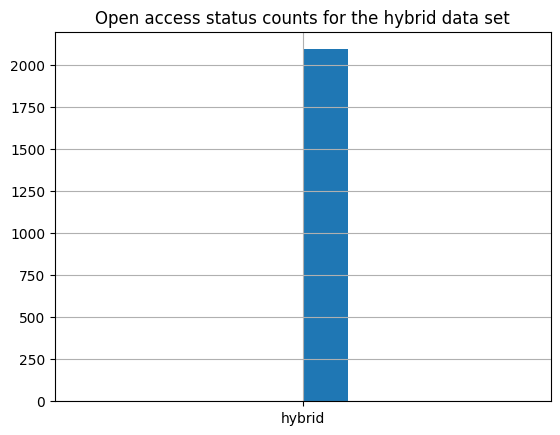

In [8]:
hybrid['oa_status'] = ['hybrid' for i in range(len(hybrid))]
hybrid = hybrid[['Journal title', 'eISSN', 'Imprint', 'Default License', 'oa_status','source']]
hybrid.columns = ['title','eISSN', 'editor','default_license', 'oa_status', 'source']
hybrid['oa_status'].hist()
plt.title('Open access status counts for the hybrid data set')

Text(0.5, 1.0, 'Default license counts for the hybrid data set')

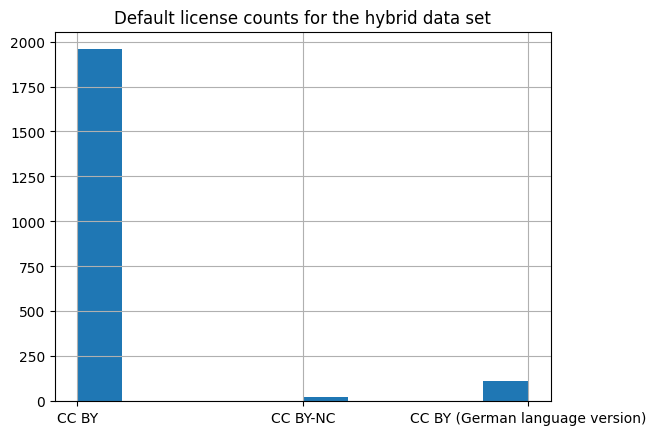

In [9]:
hybrid['default_license'].hist()
plt.title('Default license counts for the hybrid data set')

## Self-publishing archives
We retrieve data for self-publishing archives (like ArXiv) from the raw data behind ASAPbio's list of of preprint servers (Zenodo, https://doi.org/10.5281/zenodo.8230987).


In [10]:
archives_raw = pd.read_csv(archives_url)
archives_raw.sample(3)

,Preprint server,URL,Platform description,Disciplinary scope,Launch date,Ownership,Ownership type,For-profit or not-for-profit,Sustainability of the service,"Platform technology, openness of source code",...,Journal submission options,Journals directly associated with the platform,Journals to which submission is facilitated,Link to published version,Preservation of content,Usage metrics on abstract page,Commenting,Commenting moderation,Other features,Last directory update
12,Cambridge Open Engage,https://www.cambridge.org/engage/coe/public-da...,"The collaborative site to upload, share and ad...",All except clinical medicine,2019-08,Cambridge Univeristy Press,Publishing organisation (publisher),Non-profit,"Run by Cambridge University Press, also run as...","Cambridge Open Engage, closed source",...,Unrestricted - manuscript can be published in ...,NaN,NaN,"Can be added by author in dashboard, and we al...",Preservation on roadmap for future development,"Views, downloads, Altmetric, Citations, number...",Commenting feature on site,Moderated after posting if reported by user,NaN,2022-08-16
56,SSRN,https://www.ssrn.com/index.cfm/en/,...is an open-access online preprint community...,Broad scope covering multiple scientific field...,Unknown,Elsevier,Publishing organisation (publisher),For-profit,Unknown,"Unknown, Unknown",...,Unrestricted - manuscript can be published in ...,NaN,Not available,Unknown,Unknown,"Views, Downloads, Plum Metrics",NaN,NaN,Plum metrics,2023-08-08 (external content indexing only)
63,Jxiv,https://jxiv.jst.go.jp/,Jxiv is the first full-fledged preprint server...,All research fields including natural sciences...,2022-03,Japan Science and Technology Agency,governmental organization,Non-profit,operated by government budget,"Open Preprint Systems, open source",...,Unrestricted - manuscript can be published in ...,NaN,NaN,Can be added by author,To be archived in a mirror site in the near fu...,Downloads,No,NaN,Onsite search,2023-02-27


We can drill down on the `Licensing options` column to try to find the `default_license` for each repository:

In [11]:
set(archives_raw['Licensing options'])

{'All Rights Reserved, CC-BY 4.0, CC-BY-NC-ND 4.0, CC-BY-NC-SA 4.0, CC-0',
 'Authors are provided with a choice of licenses: CC BY Attribution 4.0 International, CC0 1.0 Universal, Academic Free License (AFL) 3.0, GNU Lesser General Public License (LGPL) 2.1, with no preference for which license chosen',
 'Authors are provided with a choice of licenses: CC BY Attribution 4.0 International, CC0 1.0 Universal, CC BY Attribution-ShareAlike 4.0 International, CC BY Attribution-NonCommercial-NoDerivatives 4.0 International; with no preference for which license chosen',
 'Authors are provided with a choice of licenses: CC BY Attribution 4.0 International, CC0 1.0 Universal, No license; with no preference for which license chosen',
 'Authors are provided with a choice of licenses: CC BY Attribution-ShareAlike 4.0 International, CC BY Attribution-NonCommercial-NoDerivatives 4.0 International, CC BY Attribution 4.0 International, CC0 1.0 Universal, CC BY Attribution-ShareAlike 4.0 International

The following code chunk analyzes the values for `Licensing options` and sets the `default_license` and `oa_status`, when possible:

In [12]:
for i, row in archives_raw.iterrows():
    listed_licenses = row['Licensing options']
    license_val = 'unknown'
    oa_status = 'green'
    if type(listed_licenses) == str:
        if 'Unknown' == listed_licenses:
            license_val = 'unknown'
            oa_status = 'unknown'
        elif 'Authors must use no license (all rights reserved)' in listed_licenses:
            license_val = 'closed'
            oa_status = 'closed'
        elif any(license in listed_licenses for license in open_licenses):
            if 'no reuse' not in listed_licenses:
                license_val = 'open, unknown type'
                oa_status = 'green'
        elif 'Authors must use CC' in listed_licenses:
            oa_status = 'green'
            license_val = listed_licenses.split('Authors must use ')[1].split('license')[0]
            if license_val == 'no ':
                license_val = 'closed'
                oa_status = 'closed'
        elif 'Authors must select one of six Creative' or 'with CC0 or CC BY preferred' in listed_licenses:       
            if 'with CC BY preferred' in listed_licenses:
                license_val = 'CC BY'
                oa_status = 'green'
            else:
                license_val = 'CC BY + CC0'
                oa_status = 'green'
                

    archives_raw.at[i, 'license'] = license_val
    archives_raw.at[i, 'oa_status'] = oa_status
    
# Convert the 'license' column to object dtype
archives_raw['license'] = archives_raw['license'].astype('str')
archives_raw['oa_status'] = archives_raw['oa_status'].astype('str')

/tmp/ipykernel_59566/1297236607.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'open, unknown type' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  archives_raw.at[i, 'license'] = license_val
/tmp/ipykernel_59566/1297236607.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'green' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  archives_raw.at[i, 'oa_status'] = oa_status


Drop and rename columns, visualize the obtained `oa_status`:

Text(0.5, 1.0, 'Open access status counts for the archives data set')

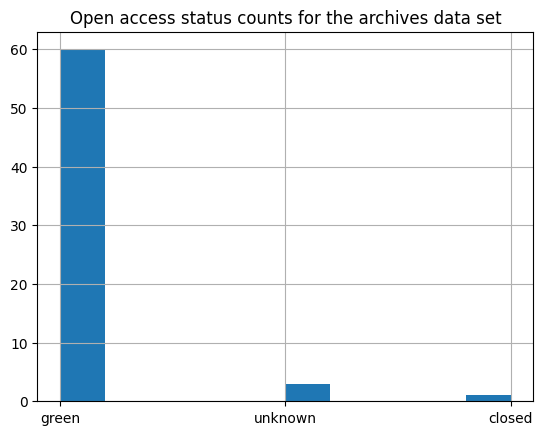

In [13]:
archives = pd.DataFrame({'title': archives_raw['Preprint server'],
                         'eISSN': 'unknown',
                         'editor': archives_raw['Ownership'],
                         'default_license': archives_raw['license'],
                         'oa_status': archives_raw['oa_status'],
                         'source': [archives_url for i in range(len(archives_raw))]})
archives['oa_status'].hist()
plt.title('Open access status counts for the archives data set')

And `default_license`:

Text(0.5, 1.0, 'Default license counts for the archives data set')

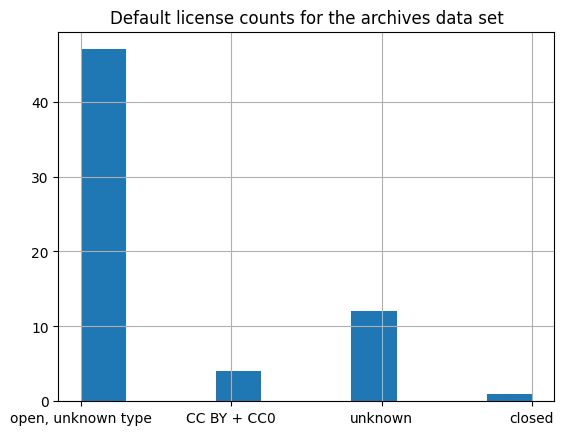

In [14]:
archives['default_license'].hist()
plt.title('Default license counts for the archives data set')

## Concatenate data
We concatenate the data and visualize the overall `oa_status` counts:


Text(0.5, 1.0, 'Open access status counts for the complete data set')

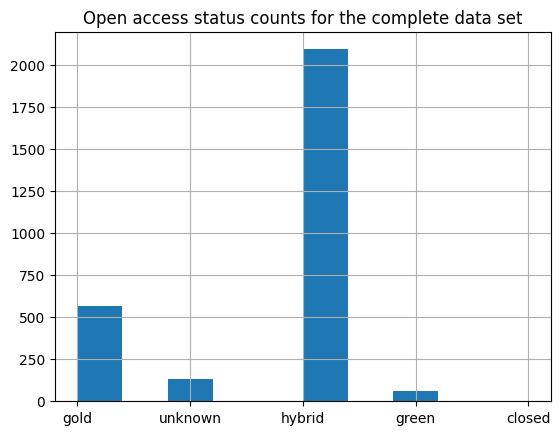

In [15]:
all = pd.concat([gold, hybrid, archives])
all['oa_status'].hist()
plt.title('Open access status counts for the complete data set')

As well as the overall `default_license` counts:

Text(0.5, 1.0, 'Default license counts for the complete data set')

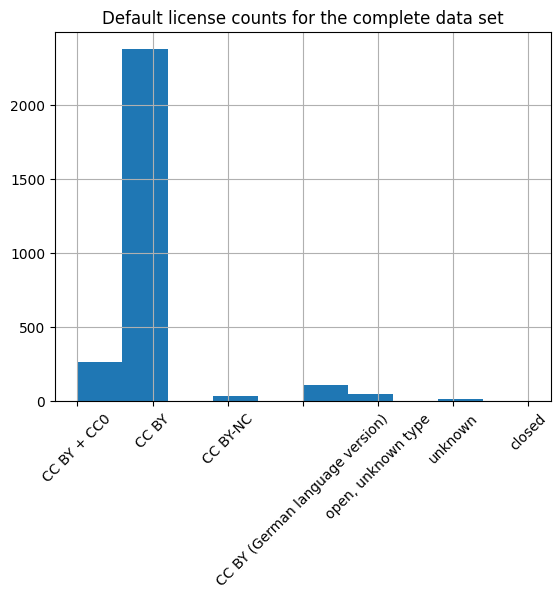

In [16]:
all['default_license'].hist()
plt.xticks(rotation=45)
plt.title('Default license counts for the complete data set')

In [17]:
all.describe()

,title,eISSN,editor,default_license,oa_status,source
count,2848,2845,2844,2848,2848,2848
unique,2848,2782,117,7,5,3
top,3D Printing in Medicine,unknown,Springer,CC BY,hybrid,https://resource-cms.springernature.com/spring...
freq,1,64,1998,2374,2091,2091


Lastly, we concatenate the data for the three data sets and export as [`oa_status.yaml`](../../data/oa_status.yaml).


In [18]:
yaml_data = all.to_dict(orient='records')
formatted_yaml_data = [{entry['title']: {key: entry[key] for key in entry if key != 'title'}} for entry in yaml_data]

# Save YAML to a file
with open('../../data/oa_status.yaml', 'w') as file:
    yaml.dump(formatted_yaml_data, file, default_flow_style=False)


In [19]:
formatted_yaml_data[0]

{'3D Printing in Medicine': {'eISSN': '2365-6271',
  'editor': 'BioMed Central',
  'default_license': 'CC BY + CC0',
  'oa_status': 'gold',
  'source': 'https://resource-cms.springernature.com/springer-cms/rest/v1/content/26206380/data/v7'}}